In [2]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

# all GENIE CC interactions
Oct 23, 2017

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/InitialSampleOfEvents/'

# µp-events: general features
### To this end, we collect all CC events in which at least one proton was produced together with the muon

In [4]:
# GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/prodgenie_bnb_nu_uboone_overlay_mcc8_reco2_genie.csv')
GENIEall = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/ecohen_physical_files_adi_prodgenie_bnb_nu_uboone_overlay_cosmic_data_100K_reco2_2018_03_26_genie.csv')
print len(GENIEall),' GENIE interaction'

96121  GENIE interaction


In [5]:
CC_Np_200MeVc = GENIEall[(GENIEall['IsCC_Np_200MeVc']==True)]
CC_Np_200MeVc_contained = CC_Np_200MeVc[(CC_Np_200MeVc['IsVertexContained']==True)]
CC_Np_200MeVc_mu_reco = CC_Np_200MeVc_contained[(CC_Np_200MeVc_contained['Is_mu_TrackReconstructed']==True)]
CC_Np_200MeVc_mu_recoInFV = CC_Np_200MeVc_mu_reco[(CC_Np_200MeVc_mu_reco['Is_mu_TrackInFV']==True)]
CC_Np_200MeVc_vertex_recoInFV = CC_Np_200MeVc_mu_recoInFV[(CC_Np_200MeVc_mu_recoInFV['IsVertexReconstructed']==True)&(CC_Np_200MeVc_mu_recoInFV['IsVertexInFV']==True)]

mup_df=pd.DataFrame({'name':[r'$1{\mu} N_{p>200 MeV/c}$'
                                ,r'$\\nu$-int. in 89 tons'
                                ,r'$\mu$ reconstructed'
                                ,r'$\mu$ reconstructed and in FV'
                                ,r'$\mu+ N_p$ tracks reco. in FV'
                             ]
                     ,'label':[r'1$\mu$, at least 1$p>200$ MeV/c'
                                ,r'$\nu$ - interaction contained in active volume'
                                ,r'$\mu$ track reconstructed'
                                ,r'$\mu$ track reconstructed and contained in FV'
                                ,r'$\mu$ and at least one $p$ tracks reconstructed and contained in FV'
                             ]
                       ,'sample':[CC_Np_200MeVc
                                  ,CC_Np_200MeVc_contained
                                  ,CC_Np_200MeVc_mu_reco
                                  ,CC_Np_200MeVc_mu_recoInFV
                                  ,CC_Np_200MeVc_vertex_recoInFV
                                 ]
                       ,'len(sample)':[len(CC_Np_200MeVc)
                                  ,len(CC_Np_200MeVc_contained)
                                  ,len(CC_Np_200MeVc_mu_reco)
                                  ,len(CC_Np_200MeVc_mu_recoInFV)
                                  ,len(CC_Np_200MeVc_vertex_recoInFV)
                                 ]
                     ,'color':['blue'                   
                               , 'red' 
                               , 'orange'
                               , 'green'             
                               , 'black']
                    })
mup_df['frac(sample) [%]'] = mup_df['len(sample)']/len(CC_Np_200MeVc)*100
print mup_df[['name','len(sample)','frac(sample) [%]']]

                            name  len(sample)  frac(sample) [%]
0       $1{\mu} N_{p>200 MeV/c}$        59341        100.000000
1         $\\nu$-int. in 89 tons        26600         44.825669
2            $\mu$ reconstructed        21913         36.927251
3  $\mu$ reconstructed and in FV        13473         22.704370
4  $\mu+ N_p$ tracks reco. in FV         7624         12.847778


In [6]:
CC_1p_200MeVc_0pi = GENIEall[(GENIEall['IsCC_1p_200MeVc_0pi']==True)]
CC_1p_200MeVc_0pi_contained = CC_1p_200MeVc_0pi[(CC_1p_200MeVc_0pi['IsVertexContained']==True)]
CC_1p_200MeVc_0pi_mu_reco = CC_1p_200MeVc_0pi_contained[(CC_1p_200MeVc_0pi_contained['Is_mu_TrackReconstructed']==True)]
CC_1p_200MeVc_0pi_mu_recoInFV = CC_1p_200MeVc_0pi_mu_reco[(CC_1p_200MeVc_0pi_mu_reco['Is_mu_TrackInFV']==True)]
CC_1p_200MeVc_0pi_vertex_recoInFV = CC_1p_200MeVc_0pi_mu_recoInFV[(CC_1p_200MeVc_0pi_mu_recoInFV['IsVertexReconstructed']==True)&(CC_1p_200MeVc_0pi_mu_recoInFV['IsVertexInFV']==True)]

CC1p0pi_df=pd.DataFrame({'name':[r'$1{\mu} 1_{p>200 MeV/c} 0_{\pi}$'
                                ,r'$\\nu$-int. in FV'
                                ,r'$\mu$ reconstructed'
                                ,r'$\mu$ reconstructed and in FV'
                                ,r'$\mu+ 1_p$ tracks reco. in FV'
                             ]
                     ,'label':[r'1$\mu$, at least 1$p>200$ MeV/c'
                                ,r'$\nu$ - interaction contained in active volume'
                                ,r'$\mu$ track reconstructed'
                                ,r'$\mu$ track reconstructed and contained in FV'
                                ,r'$\mu$ and $p$ tracks reconstructed and contained in FV'
                             ]
                       ,'len(sample)':[len(CC_1p_200MeVc_0pi)
                                  ,len(CC_1p_200MeVc_0pi_contained)
                                  ,len(CC_1p_200MeVc_0pi_mu_reco)
                                  ,len(CC_1p_200MeVc_0pi_mu_recoInFV)
                                  ,len(CC_1p_200MeVc_0pi_vertex_recoInFV)
                                 ]
                    })
CC1p0pi_df['frac(sample) [%]'] = CC1p0pi_df['len(sample)']/len(CC_1p_200MeVc_0pi)*100
print CC1p0pi_df[['name','len(sample)','frac(sample) [%]']]

                               name  len(sample)  frac(sample) [%]
0  $1{\mu} 1_{p>200 MeV/c} 0_{\pi}$        25235        100.000000
1                 $\\nu$-int. in FV        11316         44.842481
2               $\mu$ reconstructed         9596         38.026550
3     $\mu$ reconstructed and in FV         5639         22.345948
4     $\mu+ 1_p$ tracks reco. in FV         2905         11.511789


In [8]:
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'
_,OverlaySamples = load_MCbnbDATAcosmicSamples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
print "%d"%len(OverlaySamples['cosmic'])+' cosmic pairs and %d'%len(OverlaySamples['1mu-1p'])+' mu-p pairs in overlay'

283762 pairs from MC-BNB + cosmic DATA overlay
186485 pairs in FV
49707 are 1mu-1p, 26.7%
41519 are other pairs, 22.3%
95259 are cosmic, 51.1%
--------------------------------------------------------------
23996 are CC 1p 0pi, 12.9%
95259 cosmic pairs and 49707 mu-p pairs in overlay


In [10]:
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples
                                                                   ,cuts_order=['no cut'])
pureffOverlay

,$\mu p$ eff.,$\mu p$ pur.,CC$0\pi 1 p$ eff.,CC$0\pi 1 p$ pur.,label,1mu-1p,other pairs,cosmic,CC 1p 0pi
no cut,100.0%,26.7%,100.0%,12.9%,no cut,100.0% (49707),100.0% (41519),100.0% (95259),100.0% (23996)


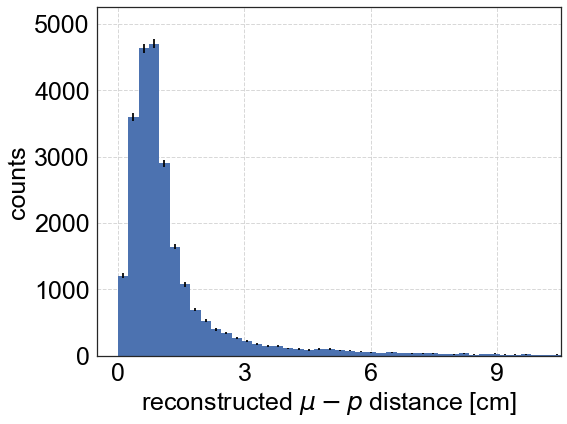

In [11]:
# fig:mup_distance
# bins=np.linspace(0,12,50) #np.linspace(-1,400,500) #  
# mupEvents = CC_Np_200MeVc_vertex_recoInFV
# print len(mupEvents)
# x = mupEvents['reconstructed mu-p distance']
# fig,ax=plt.subplots(figsize=(12,6))
# h,bins,_=ax.hist(x,bins=bins) ; mid = bins[1:] - 0.5*(bins[1]-bins[0])
# plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=1, color='red' , ecolor='black', capthick=2)
# set_axes(ax,'reconstructed $\\mu-p$ distance [cm]' , 'counts'
#          , fontsize=25 
#          , do_add_grid=True)
# plt.plot([11,11],ax.get_ylim(),'--',color='black')
# plt.savefig(figures_path+'mup_distance.pdf')

# # how many of the µp pairs are retained for a cut < 11 cm?
# print 'len(x[x>11]):',len(x[x>11]),'len(x[x<=11]):',len(x[x<=11])
# print 100.*float(len(mupEvents[mupEvents['reconstructed mu-p distance']<11]))/len(mupEvents),'%'

CC1p0pi = reducedOverlay['no cut']['CC 1p 0pi']
x = CC1p0pi['distance']
fig,ax=plt.subplots(figsize=(8,6))
h,bins,_=ax.hist(x,bins=np.linspace(0,12,50)) ; mid = bins[1:] - 0.5*(bins[1]-bins[0])
plt.errorbar(mid,h,yerr=np.sqrt(h),fmt='o',markersize=0, color='red' , ecolor='black', capthick=2)
set_axes(ax,r'reconstructed $\mu-p$ distance [cm]' , 'counts', fontsize=25 ,xticks=[0,3,6,9],xlim=(-0.5,10.5))
ax.grid(linestyle='--',alpha=0.75)
plt.plot([11,11],ax.get_ylim(),'--',color='black')
plt.tight_layout()
plt.savefig(figures_path+'mup_distance.pdf')

## un-reconstructed events

## ~50% of the µp interactions are contained in the detector
### in ~70% out of which, the µ was reconstructed (not necessarily contained)
### however only in ~ 35% of which, the proton tracks are reconstructed - where are all the unreconstructed protons?

In [12]:
def plot_proton_reco_unreco(var='truth_Pp_theta',xlabel='truth $\\theta_{p}$ [deg.]',mul=1,bins=np.linspace(0,180,45),xticks=np.linspace(0,180,7)):
    fig,ax=plt.subplots(figsize=(12,6))

    for sample,label,color in zip([CC_Np_200MeVc_mu_recoInFV,CC_Np_200MeVc_vertex_recoInFV]
                                  ,['all protons','proton reconstructed']
                                  ,['black','royalblue','salmon']):

        x = mul*sample[var]
        h , edges = np.histogram(x,bins=bins); mid = 0.5*(bins[1:] + bins[:-1]) 
        y = h.astype(float)# /len(x)
        yerr=1./np.sqrt(h)#/len(x)
        ax.errorbar( mid, y, yerr=yerr, xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)    
    set_axes(ax,xlabel , 'counts', fontsize=25,xticks=xticks,do_add_grid=True,do_add_legend=True,legend_loc='upper right')
    plt.tight_layout()
    filename=figures_path+'ProtonRecoUnreco_'+var+'.pdf'
    plt.savefig(filename)
    print 'saved',filename

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/InitialSampleOfEvents/ProtonRecoUnreco_truth_Pp_theta.pdf


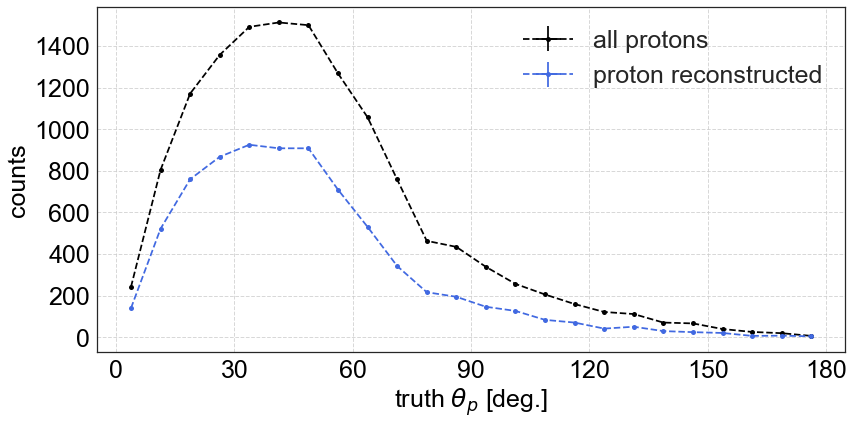

In [13]:
plot_proton_reco_unreco(var='truth_Pp_theta',xlabel=r'truth $\theta_{p}$ [deg.]'
                        ,mul=180./np.pi,bins=np.linspace(0,180,25),xticks=np.linspace(0,180,7))

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/InitialSampleOfEvents/ProtonRecoUnreco_truth_Pp.pdf


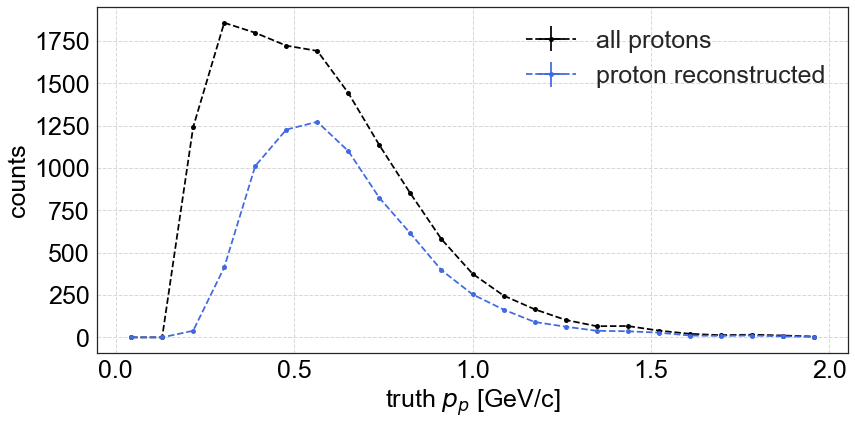

In [14]:
plot_proton_reco_unreco(var='truth_Pp',xlabel='truth $p_{p}$ [GeV/c]',bins=np.linspace(0,2,24),xticks=np.linspace(0,2,5))

# $\pi$-chart of all "other-pairs"

In [15]:
# MCbnbDATAcosmicPairsFV, MCbnbDATAcosmicSamples = load_MCbnbDATAcosmicSamples()
all_other_pairs = OverlaySamples['other pairs']

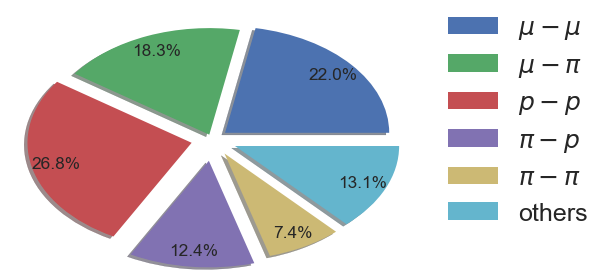

In [16]:
other_pairs_labels       = [r'$\mu-\mu$',r'$\mu-\pi$',r'$p-p$' ,r'$\pi-p$',r'$\pi-\pi$'] # ,'$\mu-e$','$\mu-\gamma$'
other_pairs_pdg_products = [13*13      , 13*211    , 2212*2212 , 211*2212 , 211*211   ] # , 13*11   , 13*22
explode                  = [0.1        , 0.05      , 0.13      , 0.2      ,0.15       ] # ,0.1      ,0.1

other_pairs = dict()
all_other_pairs_big_contribution = 0
len_other_pairs = []
for key,product in zip(other_pairs_labels,other_pairs_pdg_products):    
    other_pairs[key] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == product]
    all_other_pairs_big_contribution += len(other_pairs[key])
    len_other_pairs.append(len(other_pairs[key]))
len_non_categorized = len(all_other_pairs) - all_other_pairs_big_contribution
other_pairs_labels.append('others')
len_other_pairs.append(len_non_categorized)
explode.append(0.15)

# plot
fig=plt.figure(figsize=(6,4))
patches, texts, autotexts = plt.pie( len_other_pairs, pctdistance=0.85,explode=explode,autopct='%1.1f%%',shadow=True)
for t,at in zip(texts,autotexts): 
    t.set_size('xx-large')
    at.set_size('xx-large')
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,labels=other_pairs_labels,fontsize=25)
plt.tight_layout()
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
fig.savefig(figures_path+'pieChartOtherPairs.pdf', bbox_extra_artists=(lgd,), bbox_inches='tight')

/usr/local/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


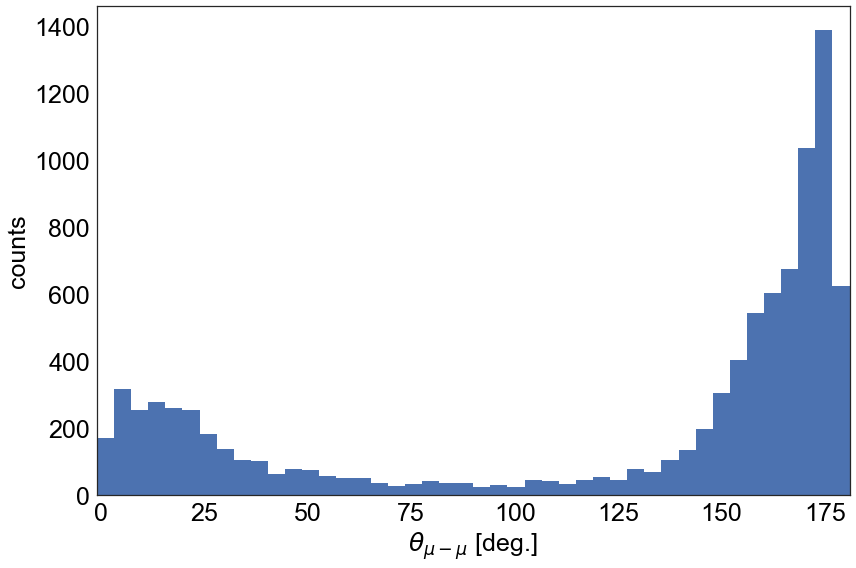

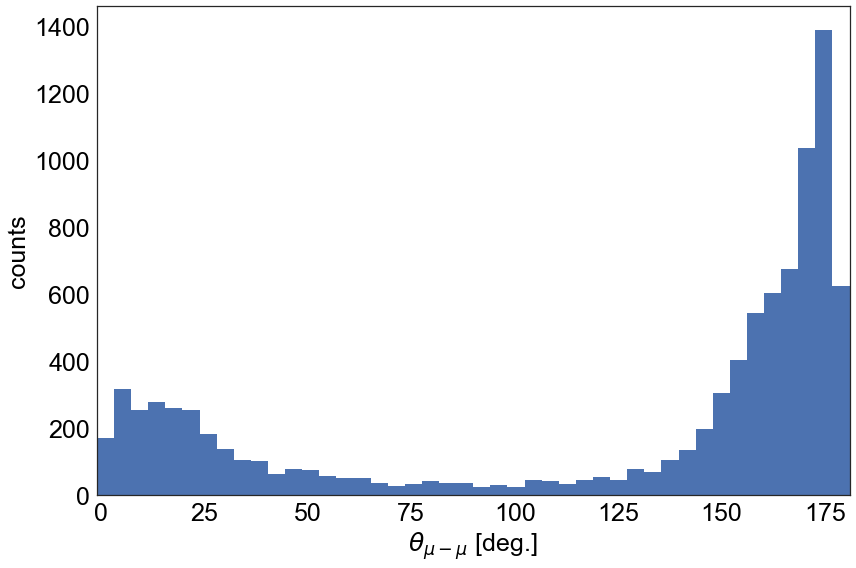

In [17]:
other_pairs['mu-mu'] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == (13*13)]
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(other_pairs['mu-mu']['theta_12'],bins=np.linspace(-1,181,45));
ax.set_xlim(-1,181);
set_axes(ax,r'$\theta_{\mu-\mu}$ [deg.]','counts')
plt.savefig(figures_path+'uuPairs_opening_angle.pdf')

samples = MCbnbMCcosmicSamples
other_pairs['mu-mu'] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == (13*13)]
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(other_pairs['mu-mu']['theta_12'],bins=np.linspace(-1,181,45));
ax.set_xlim(-1,181);
set_axes(ax,r'$\theta_{\mu-\mu}$ [deg.]','counts')

## Question by Joel, May-2018:
How is our p-p background broken down? is it mainly 1mu 2p , or 1mu and 1p with the proton track broken in two?

In [18]:
other_pairs['p-p'] = all_other_pairs[np.abs(all_other_pairs['pdg_short']*all_other_pairs['pdg_long']) == (2212*2212)]
pp = other_pairs['p-p']
len(pp)

11125

saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/mupClassification/Figures/InitialSampleOfEvents/pp_breakeup_mode.pdf


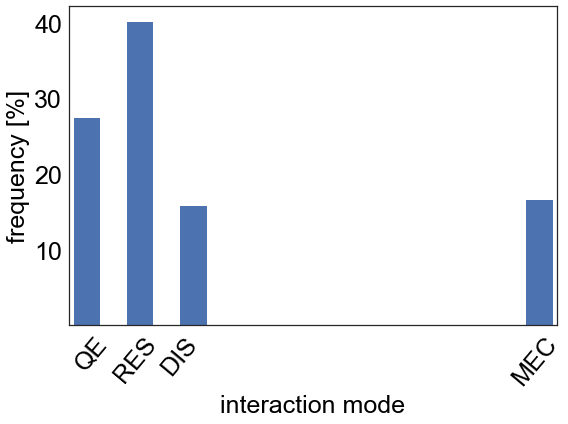

In [19]:
fig,ax=plt.subplots(figsize=(8,6))
histo,edges = np.histogram(pp.closest_genie_mode,bins=linspace(-1,11,21),normed=1);
histo = 100.*histo/np.sum(histo)
mid = 0.5*(edges[1:]+edges[:-1])
plt.bar(mid,histo,width=(mid[1]-mid[0]))
set_axes(ax,'interaction mode','frequency [%]'
         ,xticks=np.arange(0,11),xlim=(-0.5,10.5),yticks=(10,20,30,40))
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[0] = 'QE'
labels[1] = 'RES'
labels[2] = 'DIS'
labels[10] = 'MEC'
ax.set_xticklabels(labels,rotation=50);
filename=figures_path+'pp_breakeup_mode.pdf'
plt.savefig(filename)
print 'saved',filename

# reconstruction efficiency as a function of the kinematics

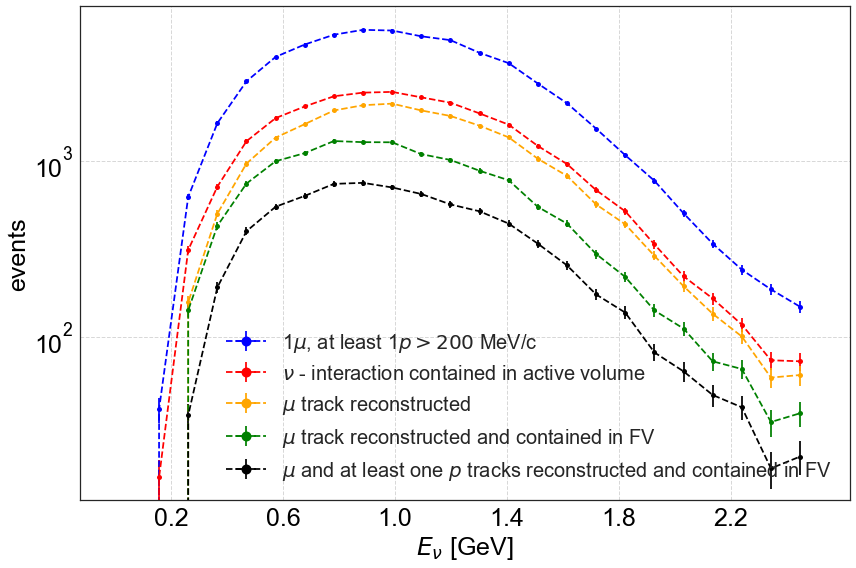

In [20]:
# fig:mupEv
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(sample['truth_Ev'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label='events',fontsize=25
         ,do_add_grid=True
         ,xticks=[0.2,0.6,1.0,1.4,1.8,2.2],yticks=[1,10,100,1000])
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'mupEv.pdf')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python2.7/site-packages/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


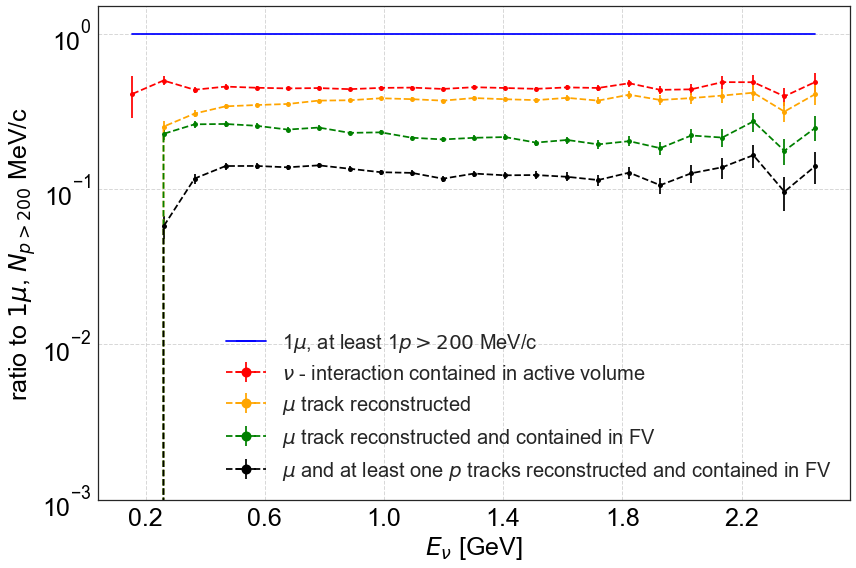

In [21]:
# fig:mupEv_ratio
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
h_CC_Np_200MeVc,bins = np.histogram(CC_Np_200MeVc['truth_Ev'],bins=bins)

for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(sample['truth_Ev'],bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$E_{\\nu}$ [GeV]',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,do_add_grid=True
         ,xticks=[0.2,0.6,1.0,1.4,1.8,2.2]
         ,ylim=(1e-3,1.5)
#          ,yticks=[1,10,100,1000]
        )
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'mupEv_ratio.pdf')

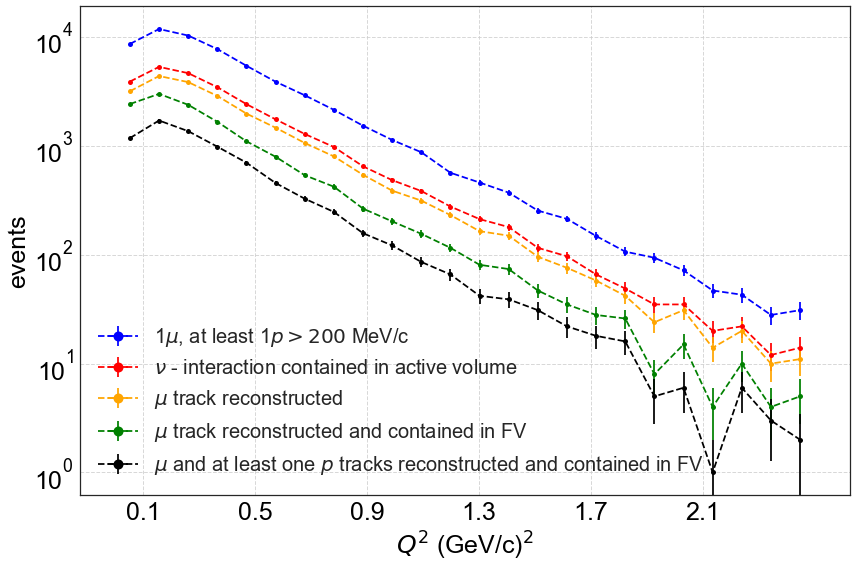

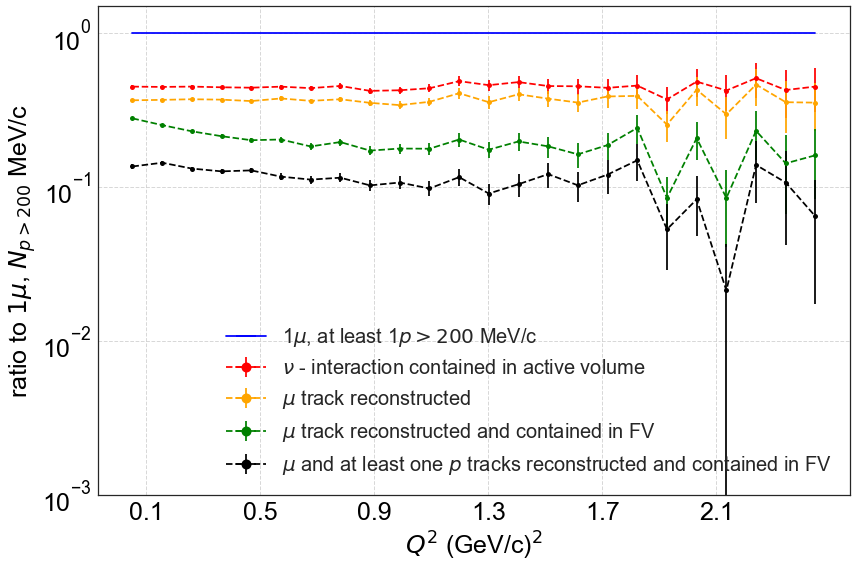

In [22]:
# fig:mupQ2
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,2.5,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(sample['truth_Q2'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower left',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$Q^{2}$ (GeV/c)$^2$',y_label='events',fontsize=25
         ,do_add_grid=True
         ,xticks=[0.1,0.5,0.9,1.3,1.7,2.1],yticks=[1,10,100,1000])
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'mupQ2.pdf')

# fig:mupQ2_ratio
fig,ax = plt.subplots(figsize=(12,8))
h_CC_Np_200MeVc,bins = np.histogram(CC_Np_200MeVc['truth_Q2'],bins=bins)
for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(sample['truth_Q2'],bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$Q^{2}$ (GeV/c)$^2$',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,do_add_grid=True
         ,xticks=[0.1,0.5,0.9,1.3,1.7,2.1]
         ,ylim=(1e-3,1.5)
        )
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'mupQ2_ratio.pdf')

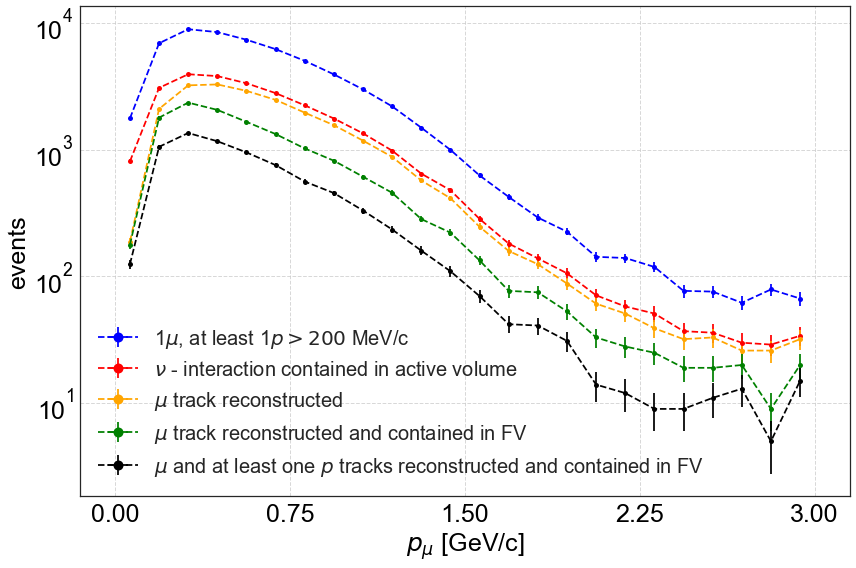

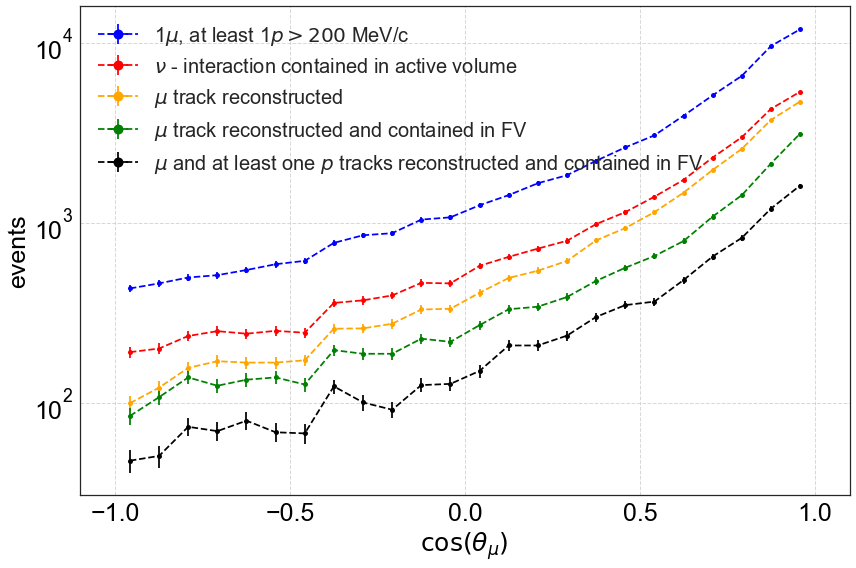

In [23]:
# fig:true_mup_truth_Pmu_momentum
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(sample['truth_Pmu'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
set_axes(ax,x_label=r'$p_{\mu}$ [GeV/c]',y_label='events',fontsize=25
         ,xticks=np.linspace(0,3.,5)
         ,yticks=[1,10,100,1000]
         ,do_add_grid=True
        )
ax.legend(loc='lower left',fontsize=20,markerscale=2.)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pmu_momentum.pdf')

# fig:true_mup_cos_truth_Pmu_theta
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(np.cos(sample['truth_Pmu_theta']),bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='upper left',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$\\cos(\\theta_{\\mu})$ ',y_label='events',fontsize=25
         ,xticks=np.linspace(-1,1,5)
         ,yticks=[1,10,100,1000,10000]
         ,do_add_grid=True)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pmu_theta.pdf')

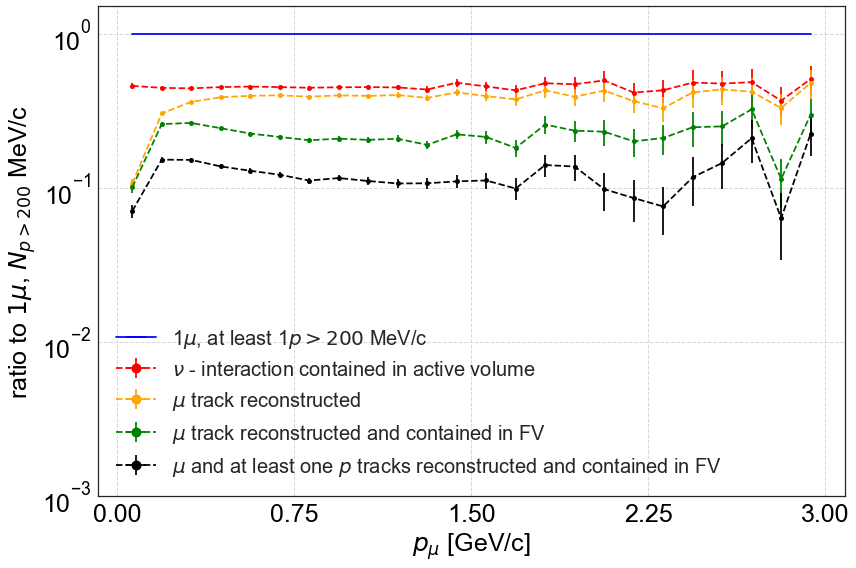

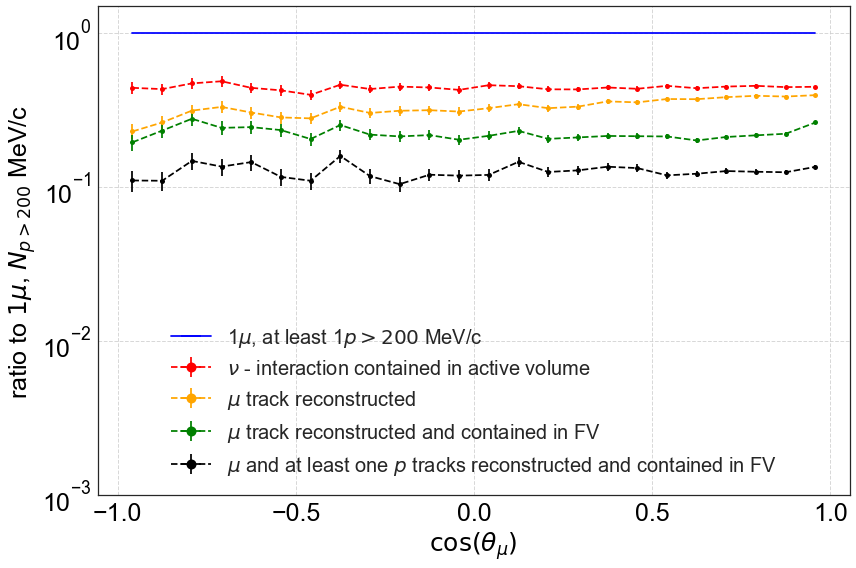

In [24]:
# fig:true_mup_truth_Pmu_momentum_ratio
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
h_CC_Np_200MeVc,bins = np.histogram(CC_Np_200MeVc['truth_Pmu'],bins=bins)

for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(sample['truth_Pmu'],bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)
set_axes(ax,x_label=r'$p_{\mu}$ [GeV/c]',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,xticks=np.linspace(0,3.,5)
         ,ylim=(1e-3,1.5)
         ,do_add_grid=True
        )
ax.legend(loc='lower left',fontsize=20,markerscale=2.)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pmu_momentum_ratio.pdf')

# fig:true_mup_cos_truth_Pmu_theta_ratio
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
h_CC_Np_200MeVc,bins = np.histogram(np.cos(CC_Np_200MeVc['truth_Pmu_theta']),bins=bins)
for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(np.cos(sample['truth_Pmu_theta']),bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)

ax.legend(loc='lower center',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$\\cos(\\theta_{\\mu})$ ',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,xticks=np.linspace(-1,1,5)
         ,ylim=(1e-3,1.5)
         ,do_add_grid=True)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pmu_theta_ratio.pdf')

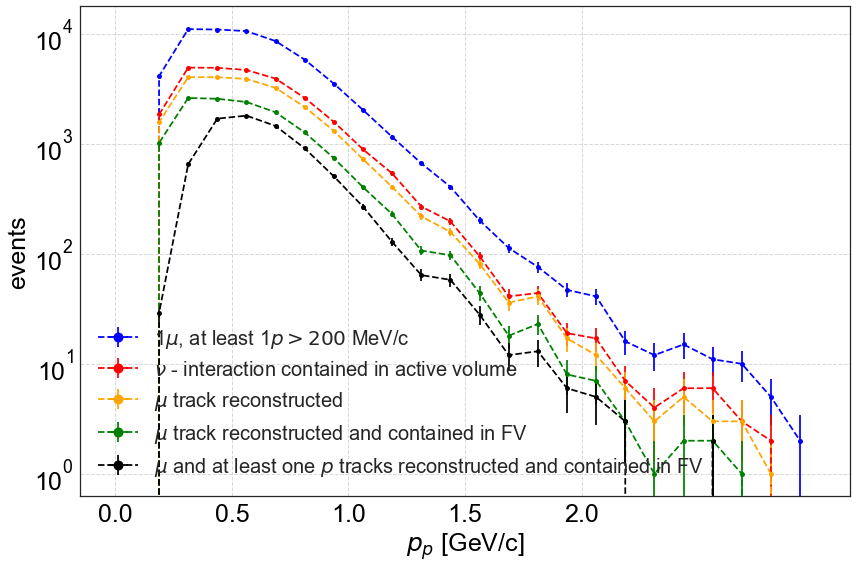

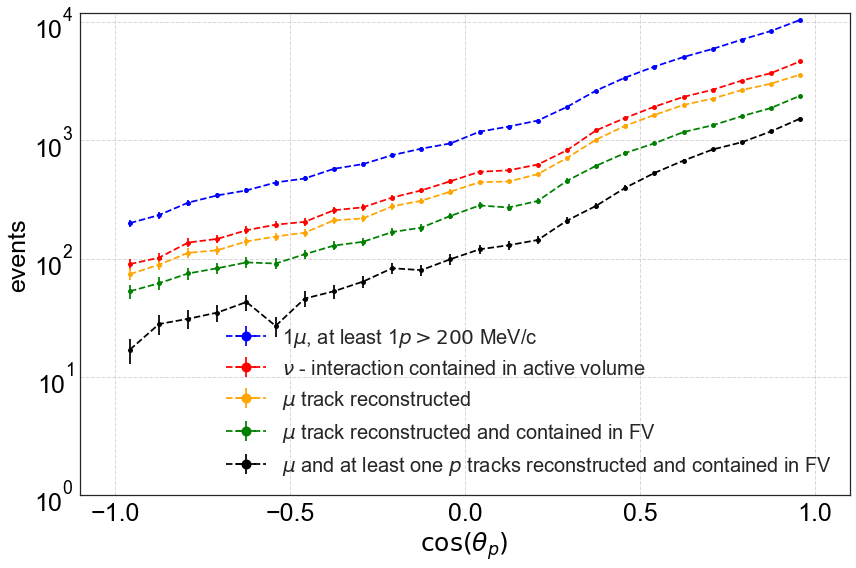

In [25]:
# fig:true_mup_truth_Pmu_momentum
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(sample['truth_Pp'],bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower left',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$p_{p}$ [GeV/c]',y_label='events',fontsize=25
         ,do_add_grid=True
         ,xticks=np.linspace(0,2,5),yticks=[1,10,100,1000])
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pp_momentum.pdf')

# fig:true_mup_cos_truth_Pp_theta
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
for sample,label,color in zip(mup_df['sample'],mup_df['label'],mup_df['color']):
    h,bins,_=plt.hist(np.cos(sample['truth_Pp_theta']),bins=bins,histtype='step',linewidth=0)
    mid = 0.5*(bins[1:] + bins[:-1])
    ax.errorbar( mid, h, yerr=np.sqrt(h), xerr=0, fmt='--o', markersize=5, color=color , ecolor=color, capthick=2,label=label)
ax.legend(loc='lower right',fontsize=20,markerscale=2.)
set_axes(ax,x_label='$\\cos(\\theta_{p})$ ',y_label='events',fontsize=25
         ,do_add_grid=True
         ,xticks=np.linspace(-1,1,5),yticks=[10,100,1000],ylim=(1,12000))
ax.set_yscale('log'); 
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pp_theta.pdf')

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:9: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: divide by zero encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in multiply


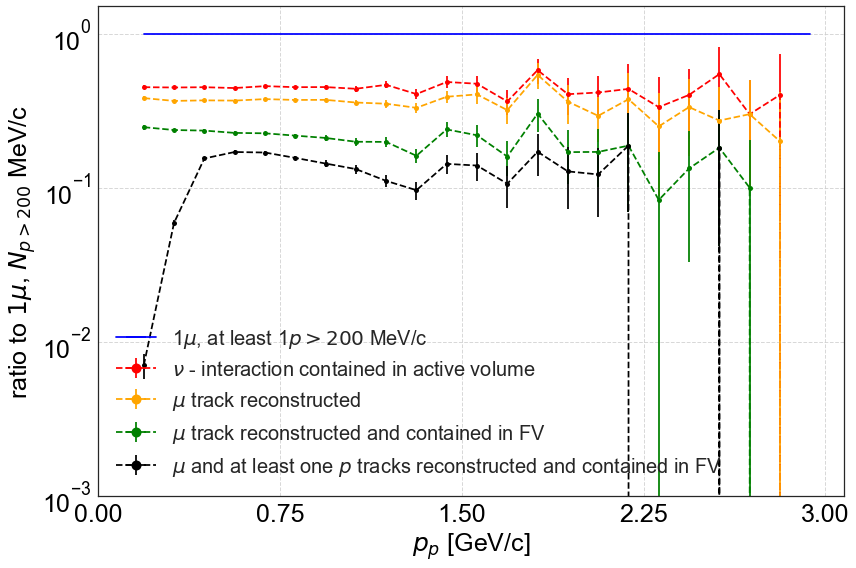

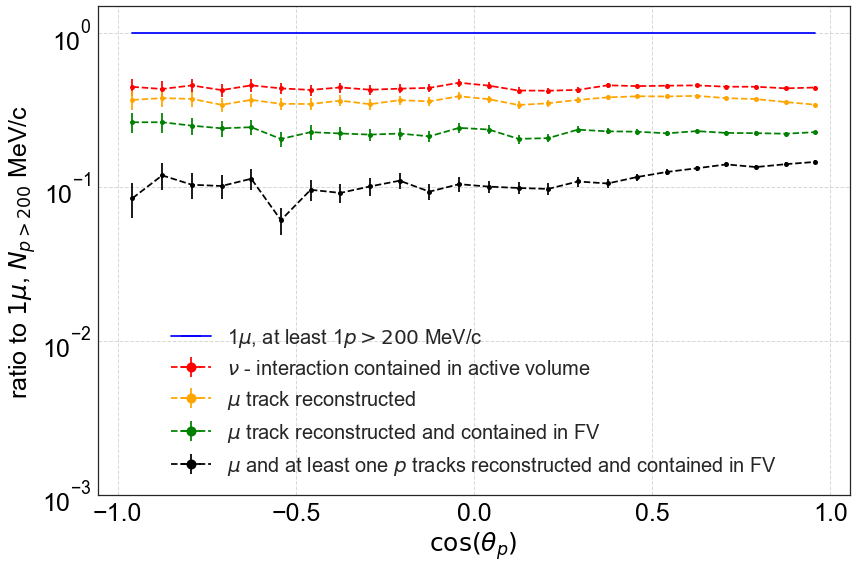

In [26]:
# fig:true_mup_truth_Pmu_momentum_ratio
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(0,3.,25)
h_CC_Np_200MeVc,bins = np.histogram(CC_Np_200MeVc['truth_Pp'],bins=bins)

for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(sample['truth_Pp'],bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)
set_axes(ax,x_label=r'$p_{p}$ [GeV/c]',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,xticks=np.linspace(0,3.,5)
         ,ylim=(1e-3,1.5)
         ,do_add_grid=True
        )
ax.legend(loc='lower left',fontsize=20,markerscale=2.)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_truth_Pp_momentum_ratio.pdf')

# fig:true_mup_cos_truth_Pmu_theta_ratio
fig,ax = plt.subplots(figsize=(12,8))
bins = np.linspace(-1,1,25)
h_CC_Np_200MeVc,bins = np.histogram(np.cos(CC_Np_200MeVc['truth_Pp_theta']),bins=bins)
for i,(sample,label,color) in enumerate(zip(mup_df['sample'],mup_df['label'],mup_df['color'])):
    h,bins = np.histogram(np.cos(sample['truth_Pp_theta']),bins=bins)
    mid = 0.5*(bins[1:] + bins[:-1])
    ratio = h.astype(np.float)/h_CC_Np_200MeVc
    ratio_err = ratio*np.sqrt( 1./h + 1./h_CC_Np_200MeVc ) if i>0 else 0
    ax.errorbar( mid, y=ratio, yerr=ratio_err if i>0 else None
                , xerr=0, fmt='--o' if i>0 else '-'
                , markersize=5, color=color , ecolor=color
                , capthick=2 if i>0 else 0
                ,label=label)

ax.legend(loc='lower center',fontsize=20,markerscale=2.)
set_axes(ax,x_label=r'$\cos(\theta_{p})$ ',y_label=r'ratio to $1\mu$, $N_{p>200}$ MeV/c'
         ,fontsize=25
         ,xticks=np.linspace(-1,1,5)
         ,ylim=(1e-3,1.5)
         ,do_add_grid=True)
ax.set_yscale('log');
plt.tight_layout()
plt.savefig(figures_path+'true_mup_cos_truth_Pp_theta_ratio.pdf')

In [27]:
sample=CC_Np_200MeVc_vertex_recoInFV

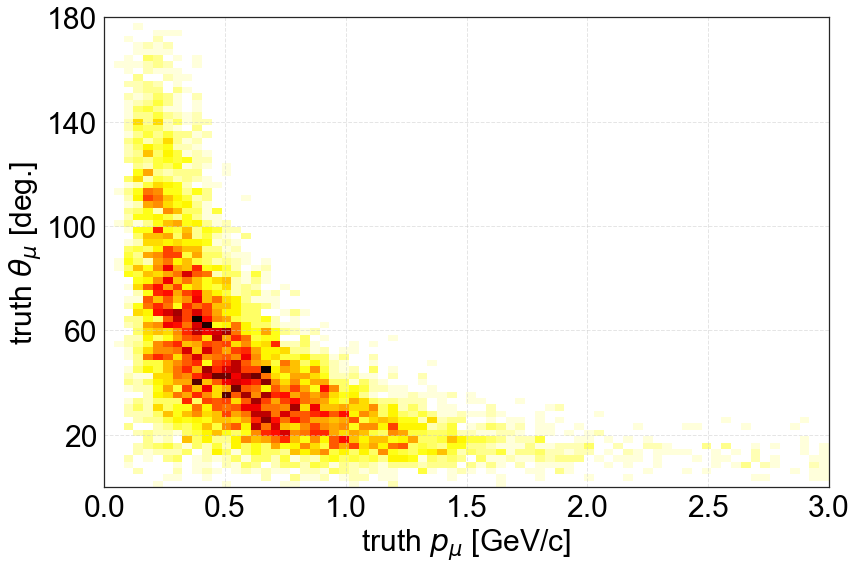

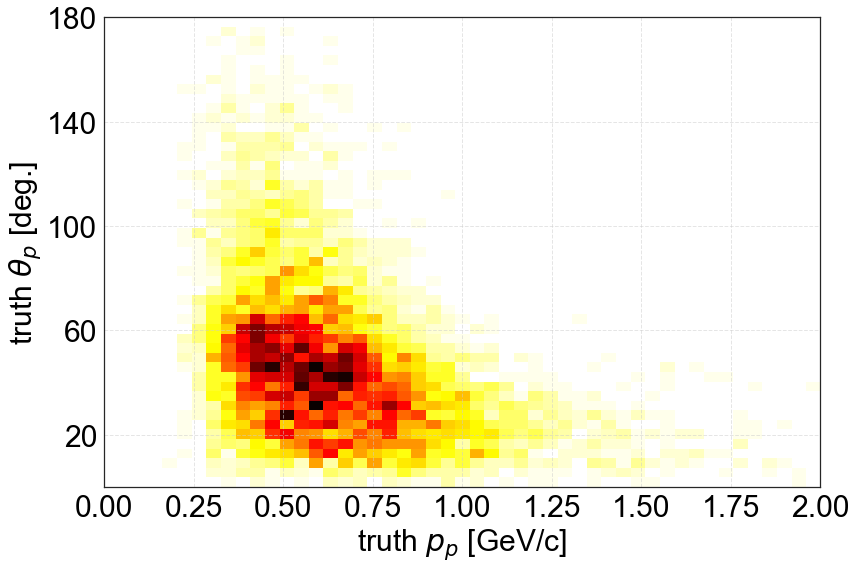

In [28]:
# fig:truth_Pmu_theta_mu
fig,ax = plt.subplots(figsize=(12,8))
bins = (np.linspace(0,3,75),np.linspace(0,180,75))
plot_2d_hist(sample['truth_Pmu'],180./np.pi*sample['truth_Pmu_theta']
             ,bins=bins,ax=ax)
# ax.hexbin(sample['truth_Pmu'],180./np.pi*sample['truth_Pmu_theta'],bins=75,cmap='hot_r')
ax.grid(linestyle='--',alpha=0.5)
set_axes(ax,x_label='truth $p_{\\mu}$ [GeV/c]',y_label='truth $\\theta_{\\mu}$ [deg.]'
         ,yticks=[20,60,100,140,180]
         ,fontsize=30)
plt.savefig(figures_path+'truth_Pmu_theta_mu.pdf')

# fig:truth_Pmu_theta_p
fig,ax = plt.subplots(figsize=(12,8))
bins = (np.linspace(0,2,50),np.linspace(0,180,50))
plot_2d_hist(sample['truth_Pp'],180./np.pi*sample['truth_Pp_theta']
             ,bins=bins,ax=ax)
# ax.hexbin(sample['truth_Pp'],180./np.pi*sample['truth_Pp_theta'],bins=75,cmap='hot_r')

ax.grid(linestyle='--',alpha=0.5)
set_axes(ax,x_label='truth $p_{p}$ [GeV/c]',y_label='truth $\\theta_{p}$ [deg.]'
         ,yticks=[20,60,100,140,180]
         ,fontsize=30)
plt.savefig(figures_path+'truth_Pmu_theta_p.pdf')